In [1]:
from fuzzylogic.classes import Domain
from fuzzylogic.functions import R, S
from fuzzylogic.classes import  Domain, Rule
from fuzzylogic.functions import alpha, triangular
from fuzzylogic.hedges import plus, minus, very
import matplotlib.pyplot as plt
from fuzzylogic.functions import (sigmoid, gauss, trapezoid,
                                  triangular_sigmoid, rectangular, singleton, bounded_linear, linear, bounded_sigmoid)

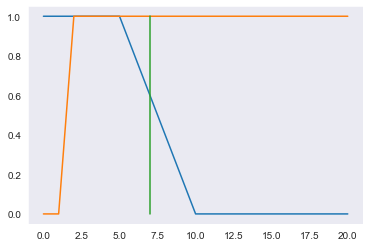

In [2]:
T = Domain('test', 0, 20, res = 0.1)
"""Domain использует маг атрибут __slots__ поэтому после его создания переменные создаются именно через домен.переменная 5 параметров: название, минимум, максимум, шаг дискретизации"""
def plot_scatter(x):    # Для отрисовки перпендикуляра точки
    plt.plot([x,x],[0,1])
T.up = S(5,10)  # для спада
T.down = R(1,2) # для переднего фронта
plt.grid() # сетка
T.up.plot() # Отрисовка созданной функции
T.down.plot()
plot_scatter(7)
T(7) # Для определения степени принадлежности данной точки к множеству
plt.show()

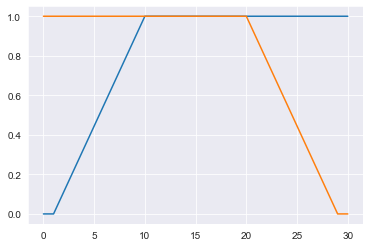

In [3]:
T = Domain("test", 0, 30, res=0.1)
T.up = R(1,10)
T.up.plot()
T.down = S(20, 29)
T.down.plot()

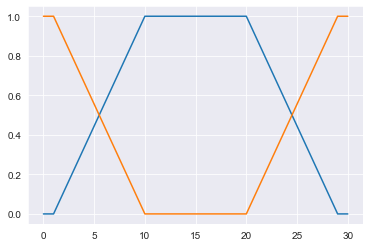

In [4]:
T.polygon = T.up & T.down # Работает как обычное логическое И
T.polygon.plot()
T.inv_polygon = ~T.polygon
T.inv_polygon.plot()

Различные функции границ множеств
sigmoid, gauss, trapezoid, triangular_sigmoid, rectangular, bounded_linear, singleton, linear, R, S

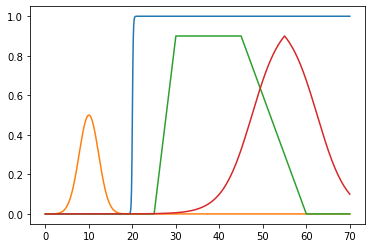

In [58]:
T = Domain("test", 0, 70, res=0.1)
T.sigmoid = sigmoid(1,10,20) # sigmoid(L, k, x0) f(x) = L / (1 + e^(-k*(x-x0))) L - Высота функции, k - крутизна, x0 центр сигмоида
T.sigmoid.plot()
T.gauss = gauss(10, .1, c_m=0.5) # gauss(c, b, *, c_m=1): c - точка максимума b - крутизна c_m - Высота функции
T.gauss.plot()
T.trapezoid = trapezoid(25, 30, 45, 60, c_m=0.9) # ну тут понятно точки перегибов и высота
T.trapezoid.plot()
T.triangular_sigmoid = triangular_sigmoid(40, 70, c=55) # Начало, конец, центр
T.triangular_sigmoid.plot()

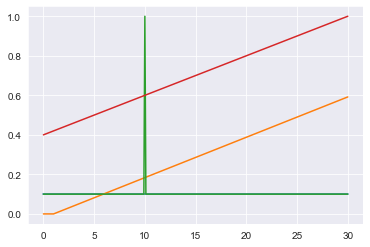

In [5]:
T.rectangular = rectangular(35, 45, c_m=0.95, no_m=0.1 ) # Передний, задний, c_m - высота, no_m = начальная высота отноительно оси х
T.rectangular.plot()
T.bounded_linear = bounded_linear(1,50, c_m=1, no_m=0) # По аналогии с функцией R, но у R только начало и конец нет настроек высоты
T.bounded_linear.plot()
T.singleton = singleton(10, no_m=0.1, c_m=1) # Единичный импульс
T.singleton.plot()
T.linear =  linear(0.02,0.4) # линия которая строится по уравнению прямой 00.2*Х+0.4
T.linear.plot()

Параметры minus plus и very

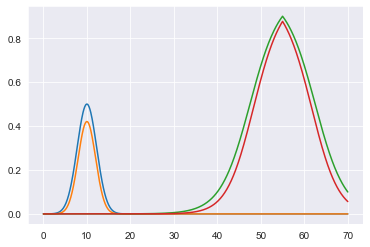

In [6]:
# plus - это функция в степени ^1.25
T = Domain("test", 0, 70, res=0.1)
T.gauss = gauss(10, .1, c_m=0.5) # gauss(c, b, *, c_m=1): c - точка максимума b - крутизна c_m - Высота функции
T.gauss.plot()
T.gauss_plus = plus(T.gauss)
T.gauss_plus.plot()
T.triangular_sigmoid = triangular_sigmoid(40, 70, c=55) # Начало, конец, центр
T.triangular_sigmoid.plot()
T.triangular_sigmoid_plus = plus(T.triangular_sigmoid)
T.triangular_sigmoid_plus.plot()

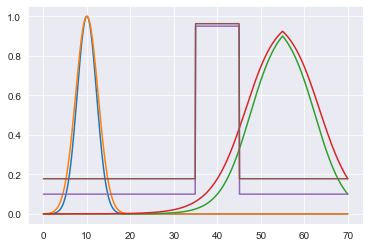

In [7]:
# minus - это функция в степени ^0.75
T.gauss = gauss(10, .1, c_m=1) # gauss(c, b, *, c_m=1): c - точка максимума b - крутизна c_m - Высота функции
T.gauss.plot()
T.gauss_minus = minus(T.gauss)
T.gauss_minus.plot()
T.triangular_sigmoid = triangular_sigmoid(40, 70, c=55) # Начало, конец, центр
T.triangular_sigmoid.plot()
T.triangular_sigmoid_minus = minus(T.triangular_sigmoid)
T.triangular_sigmoid_minus.plot()
T.rectangular = rectangular(35, 45, c_m=0.95, no_m=0.1 ) # Передний, задний, c_m - высота, no_m = начальная высота отноительно оси х
T.rectangular.plot()
T.rectangular_minus = minus(T.rectangular)
T.rectangular_minus.plot()

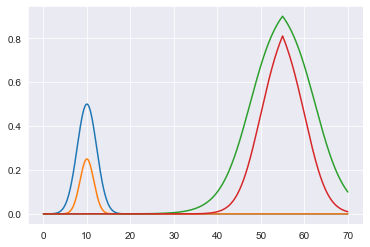

In [8]:
# very - это функция в степени ^2
T.gauss = gauss(10, .1, c_m=0.5) # gauss(c, b, *, c_m=1): c - точка максимума b - крутизна c_m - Высота функции
T.gauss.plot()
T.gauss_very = very(T.gauss)
T.gauss_very.plot()
T.triangular_sigmoid = triangular_sigmoid(40, 70, c=55) # Начало, конец, центр
T.triangular_sigmoid.plot()
T.triangular_sigmoid_very = very(T.triangular_sigmoid)
T.triangular_sigmoid_very.plot()

{Set(<function minus.<locals>.f at 0x000001DD70504040>): 0.5443310539518174,
 Set(<function very.<locals>.f at 0x000001DD705040D0>): 0.6400000000000001,
 Set(<function bounded_sum.<locals>.f at 0x000001DD70534D30>): 0.8359591794226543}

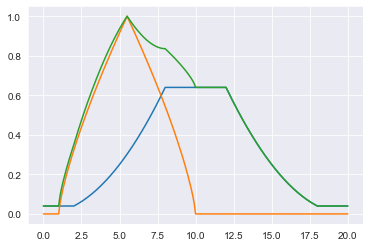

In [9]:
numbers = Domain("numbers", 0, 20, res=0.1)

close_to_10 = alpha(floor=0.2, ceiling=0.8, func=triangular(0, 20))
close_to_5 = triangular(1, 10)

numbers.foo = minus(close_to_5)
numbers.bar = very(close_to_10)

numbers.bar.plot()
numbers.foo.plot()
numbers.baz = numbers.foo + numbers.bar
numbers.baz.plot()

numbers(8)

{Set(<function bounded_sigmoid.<locals>.f at 0x000001DD7053E5E0>): 0.5,
 Set(<function bounded_sigmoid.<locals>.f at 0x000001DD705B0310>): 0.012195121951219511,
 Set(<function MIN.<locals>.F at 0x000001DD705B0820>): 0.5}

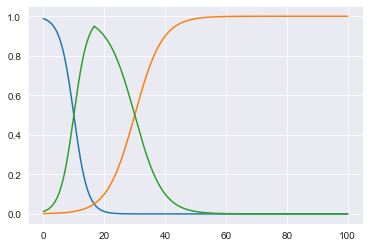

In [10]:
T = Domain("temperature", 0, 100, res=0.1)
T.cold = bounded_sigmoid(5,15, inverse=True)
T.cold.plot()
T.hot = bounded_sigmoid(20, 40)
T.hot.plot()
T.warm = ~T.hot & ~T.cold
T.warm.plot()
T(10)

In [109]:
temp = Domain("Temperature", 0, 80)
hum = Domain("Humidity", 0, 100)
motor = Domain("Speed", 0, 2000)

temp.cold = S(0,40)
temp.hot = R(30,60)
#temp.cold.plot()
#temp.hot.plot()
#plt.title('Temperature')
#plt.show()

hum.dry = S(20,50)
hum.wet = R(35,70)
#hum.dry.plot()
#hum.wet.plot()
#plt.title("Humidity")
#plt.show()

motor.fast = R(1000,1500)
motor.slow = ~motor.fast # Эквивалент записи S(1000,1500)
#motor.fast.plot()
#motor.slow.plot()
#plt.title("Speed")
#plt.show()

R1 = Rule({(temp.hot, hum.dry): motor.fast})
R4 = Rule({(temp.cold, hum.wet): motor.slow})
rules = Rule({(temp.hot, hum.dry): motor.fast,          #(temp.cold, hum.dry): very(motor.slow), (temp.hot, hum.wet): very(motor.fast),
              (temp.cold, hum.wet): motor.slow,
              })
t = 20
h = 50
values = {hum: h, temp: t}
print(R1(values), R4(values), "=>", rules(values))
print(temp(t))
print(hum(h))
motor.th = temp.hot | hum.dry
motor.th.plot()

None 632.7635862196851 => 632.7635862196851
{Set(<function S.<locals>.f at 0x000001DD72CE0820>): 0.5, Set(<function R.<locals>.f at 0x000001DD72FCD280>): 0}
{Set(<function S.<locals>.f at 0x000001DD72FCD310>): 0, Set(<function R.<locals>.f at 0x000001DD72FCD8B0>): 0.42857142857142855}


AssertionError: 

{Set(<function S.<locals>.f at 0x000001DD70504DC0>): 0, Set(<function R.<locals>.f at 0x000001DD705044C0>): 1}
{Set(<function S.<locals>.f at 0x000001DD703FADC0>): 0, Set(<function R.<locals>.f at 0x000001DD70504940>): 1}
None None None 632.7635862196851 => 632.7635862196851


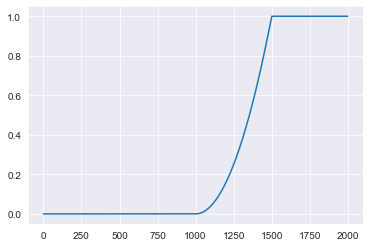

In [71]:
print(temp(80))
print(hum(80))
values = {hum: 80, temp: -80}
print(R1(values), R2(values), R3(values), R4(values), "=>", rules(values))
motor.very = very(motor.fast)
motor.very.plot()

In [69]:
temp.ihum = temp.cold & hum.wet
temp.ihum.plot()

AssertionError: 

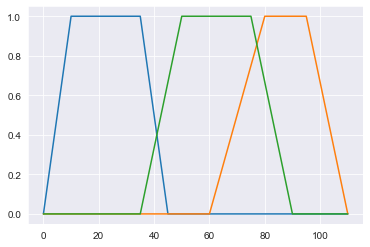

None None 2244.4598252563524 => 2244.4598252563524


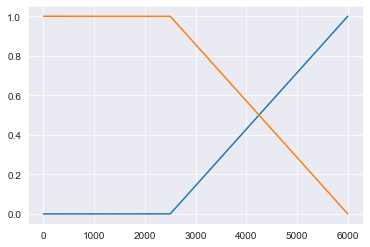

In [16]:
# Ну впринципе круиз контроль работает нужно только еще правил добавить и будет идеал, в некоторых значениях получается везде None
speed = Domain("Speed", 0, 110)
RPM = Domain("RPM", 0, 6000)
speed.low = trapezoid(0, 10, 35, 45, c_m=1)
speed.low.plot()
speed.fast = trapezoid(60, 80, 95, 110, c_m=1)
speed.fast.plot()
speed.average = trapezoid(35, 50, 75, 90, c_m=1)
speed.average.plot()
plt.show()
RPM.maxi = R(2500, 6000)
RPM.maxi.plot()
RPM.mini = ~RPM.maxi
RPM.mini.plot()

Rule1 = Rule({(speed.low, RPM.mini): very(RPM.maxi)})
Rule2 = Rule({(speed.average,RPM.mini): RPM.maxi})
Rule3 = Rule({(speed.fast, RPM.maxi) : RPM.mini})

rule = Rule({(speed.low, RPM.mini): very(RPM.maxi),
             (speed.average,RPM.mini): RPM.maxi,
             (speed.fast, RPM.maxi) : RPM.mini})
values = {speed: 100, RPM: 5000}
print(Rule1(values), Rule2(values), Rule3(values), "=>", rule(values))